<a href="https://colab.research.google.com/github/CactusStz/Analisis-Data/blob/main/Proyek_Analisis_Data_Bike_Service.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Menentukan Pertanyaan Bisnis

- Bagaimana variasi penyewaan sepeda per jam (cnt) di berbagai musim (season) dan antara pengguna biasa (casual) dan pengguna terdaftar (registered).
- Apa dampak kondisi cuaca (weathersit), suhu (temp dan atemp), dan kecepatan angin (windspeed) pada distribusi penyewaan sepeda (cnt), dan apakah terdapat perbedaan yang signifikan dalam hal sensitivitas terhadap faktor-faktor tersebut antara pengguna biasa dan pengguna terdaftar pada tingkat per jam dan per hari?





## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Hanya ada satu perbedaan kolom antara day.csv dan hour.csv, dimana hour.csv memiliki kolom "hr" untuk melihat berapa lama dalam jam sebuah sepeda di rental.
- Info Kolom
  - **instant**: record index
  - **dteday** : date
  - **season** : season (1:springer, 2:summer, 3:fall, 4:winter)
  - **yr** : year (0: 2011, 1:2012)
  - **mnth** : month ( 1 to 12)
  - **hr** : hour (0 to 23)
  - **holiday** : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
  - **weekday** : day of the week
  - **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.
  + **weathersit** :
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
  - **temp** : Normalized temperature in Celsius. The values are divided to 41 (max)
  - **atemp**: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
  - **hum**: Normalized humidity. The values are divided to 100 (max)
  - **windspeed**: Normalized wind speed. The values are divided to 67 (max)
  - **casual**: count of casual users
  - **registered**: count of registered users
  - **cnt**: count of total rental bikes including both casual and registered


### Assesing Data

#### Menilai data Day.csv

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight**
- Day.csv, kolom dteday seharusnya bertipe data datetime agar mudah dianalis nantinya.

#### Menilai data hour.csv

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight**
- Adanya kolom data yang kosong pada kolom hum, windspeed, casual dan cnt
- Adanya perbedaan tipe data pada kolom casual, registered, dan cnt antara day.csv dan hour.csv
- hour.csv, kolom dteday seharusnya bertipe data datetime agar mudah dianalis nantinya.

### Cleaning Data

#### Menangani data kosong pada hour.csv

In [ ]:
hour_df[hour_df.hum.isna()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


Setelah melihat kolom data "hum" yang kosong datanya, ketahuan juga bahwa baris kolom data "windspeed", "casual", "registered", "cnt" yang kosong juga terdapat pada baris data yang sama. Karena hanya ada 1 row data yang datanya ada yang kosong, kita dapat drop row data tersebut.

In [ ]:
hour_df = hour_df.dropna()

In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


#### Menyamakan tipe data antara day.csv dan hour.csv

In [ ]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [ ]:
hour_df = hour_df.astype({'casual':'int','registered':'int','cnt':'int'})
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Memapping data di column season, yr, mnth, dan weekday agar mudah dibaca

In [ ]:
print("Unique values in season:", hour_df['season'].unique())
print("Unique values in yr:", hour_df['yr'].unique())
print("Unique values in mnth:", hour_df['mnth'].unique())
print("Unique values in weekday:", hour_df['weekday'].unique())

Unique values in season: [1 2 3 4]
Unique values in yr: [0 1]
Unique values in mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique values in weekday: [6 0 1 2 3 4 5]


In [ ]:
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
year_map = {0: '2011', 1: '2012'}
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
             7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
weekday_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday',
               5: 'Friday', 6: 'Saturday'}
weather_mapping = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'}

day_df['season'] = day_df['season'].map(season_map)
day_df['yr'] = day_df['yr'].map(year_map)
day_df['mnth'] = day_df['mnth'].map(month_map)
day_df['weekday'] = day_df['weekday'].map(weekday_map)
day_df['weathersit'] = day_df['weathersit'].map(weather_mapping)

hour_df['season'] = hour_df['season'].map(season_map)
hour_df['yr'] = hour_df['yr'].map(year_map)
hour_df['mnth'] = hour_df['mnth'].map(month_map)
hour_df['weekday'] = hour_df['weekday'].map(weekday_map)
hour_df['weathersit'] = hour_df['weathersit'].map(weather_mapping)


In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


#### Menyiapkan data untuk menjawab pertanyaan nomor 1
- **Bagaimana variasi penyewaan sepeda per jam (cnt) di berbagai musim (season) dan antara pengguna biasa (casual) dan pengguna terdaftar (registered).**


In [ ]:
hourly_aggregated = hour_df.groupby('dteday').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum',
    'season': 'first',
    'yr': 'first',
    'mnth': 'first',
    'holiday': 'first',
    'weekday': 'first',
    'workingday': 'first'
}).reset_index()

In [ ]:
merged_data = pd.merge(day_df, hourly_aggregated, on='dteday', suffixes=('_day', '_hour'))

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant          731 non-null    int64         
 1   dteday           731 non-null    datetime64[ns]
 2   season_day       731 non-null    object        
 3   yr_day           731 non-null    object        
 4   mnth_day         731 non-null    object        
 5   holiday_day      731 non-null    int64         
 6   weekday_day      731 non-null    object        
 7   workingday_day   731 non-null    int64         
 8   weathersit       731 non-null    object        
 9   temp             731 non-null    float64       
 10  atemp            731 non-null    float64       
 11  hum              731 non-null    float64       
 12  windspeed        731 non-null    float64       
 13  casual_day       731 non-null    int64         
 14  registered_day   731 non-null    int64    

In [ ]:
merged_data.head()

,instant,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit,temp,...,cnt_day,casual_hour,registered_hour,cnt_hour,season_hour,yr_hour,mnth_hour,holiday_hour,weekday_hour,workingday_hour
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,Mist,0.344167,...,985,331,654,985,Spring,2011,January,0,Saturday,0
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,Mist,0.363478,...,801,131,670,801,Spring,2011,January,0,Sunday,0
2,3,2011-01-03,Spring,2011,January,0,Monday,1,Clear,0.196364,...,1349,120,1229,1349,Spring,2011,January,0,Monday,1
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear,0.200000,...,1562,108,1454,1562,Spring,2011,January,0,Tuesday,1
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear,0.226957,...,1600,82,1518,1600,Spring,2011,January,0,Wednesday,1


In [ ]:
merged_data['cnt_diff'] = merged_data['cnt_day'] - merged_data['cnt_hour']
print(merged_data['cnt_diff'].describe())

count    731.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: cnt_diff, dtype: float64


## Exploratory Data Analysis (EDA)

#### Menjawab pertanyaan nomor 1
- Bagaimana variasi penyewaan sepeda per jam (cnt) di berbagai musim (season) dan antara pengguna biasa (casual) dan pengguna terdaftar (registered).

In [ ]:
seasonal_summary = merged_data.groupby('season_day').agg({
    'casual_day': 'mean',
    'registered_day': 'mean',
    'cnt_day': 'mean'
}).reset_index()
print(seasonal_summary)


  season_day   casual_day  registered_day      cnt_day
0       Fall  1202.611702     4441.691489  5644.303191
1     Spring   334.928177     2269.204420  2604.132597
2     Summer  1106.097826     3886.233696  4992.331522
3     Winter   729.112360     3999.050562  4728.162921


In [ ]:
hourly_trends = hour_df.groupby(['season', 'hr']).agg({'cnt': 'mean'}).reset_index()


#### Menjawab pertanyaan nomor 2
- Apa dampak kondisi cuaca (weathersit), suhu (temp dan atemp), dan kecepatan angin (windspeed) pada distribusi penyewaan sepeda (cnt), dan apakah terdapat perbedaan yang signifikan dalam hal sensitivitas terhadap faktor-faktor tersebut antara pengguna biasa dan pengguna terdaftar pada tingkat per jam dan per hari?

In [ ]:
weather_summary = merged_data.groupby('weathersit')[['casual_day', 'registered_day', 'cnt_day']].mean()
print(weather_summary)

                 casual_day  registered_day      cnt_day
weathersit                                              
Clear            964.030238     3912.755940  4876.786177
Light Snow/Rain  185.476190     1617.809524  1803.285714
Mist             687.352227     3348.510121  4035.862348


In [ ]:
print(merged_data[['temp', 'atemp', 'windspeed', 'casual_day', 'registered_day', 'cnt_day']].corr())


                    temp     atemp  windspeed  casual_day  registered_day  \
temp            1.000000  0.991702  -0.157944    0.543285        0.540012   
atemp           0.991702  1.000000  -0.183643    0.543864        0.544192   
windspeed      -0.157944 -0.183643   1.000000   -0.167613       -0.217449   
casual_day      0.543285  0.543864  -0.167613    1.000000        0.395282   
registered_day  0.540012  0.544192  -0.217449    0.395282        1.000000   
cnt_day         0.627494  0.631066  -0.234545    0.672804        0.945517   

                 cnt_day  
temp            0.627494  
atemp           0.631066  
windspeed      -0.234545  
casual_day      0.672804  
registered_day  0.945517  
cnt_day         1.000000  


In [ ]:
casual_corr = merged_data[['temp', 'atemp', 'windspeed', 'casual_day']].corr()
registered_corr = merged_data[['temp', 'atemp', 'windspeed', 'registered_day']].corr()
print("Casual User Correlations:\n", casual_corr)
print("Registered User Correlations:\n", registered_corr)

Casual User Correlations:
                 temp     atemp  windspeed  casual_day
temp        1.000000  0.991702  -0.157944    0.543285
atemp       0.991702  1.000000  -0.183643    0.543864
windspeed  -0.157944 -0.183643   1.000000   -0.167613
casual_day  0.543285  0.543864  -0.167613    1.000000
Registered User Correlations:
                     temp     atemp  windspeed  registered_day
temp            1.000000  0.991702  -0.157944        0.540012
atemp           0.991702  1.000000  -0.183643        0.544192
windspeed      -0.157944 -0.183643   1.000000       -0.217449
registered_day  0.540012  0.544192  -0.217449        1.000000


In [ ]:
merged_data['weathersit'].value_counts()

,count
weathersit,
Clear,463
Mist,247
Light Snow/Rain,21


## Visualization & Explanatory Analysis

#### Menjawab pertanyaan nomor 1
- Bagaimana variasi penyewaan sepeda per jam (cnt) di berbagai musim (season) dan antara pengguna biasa (casual) dan pengguna terdaftar (registered).

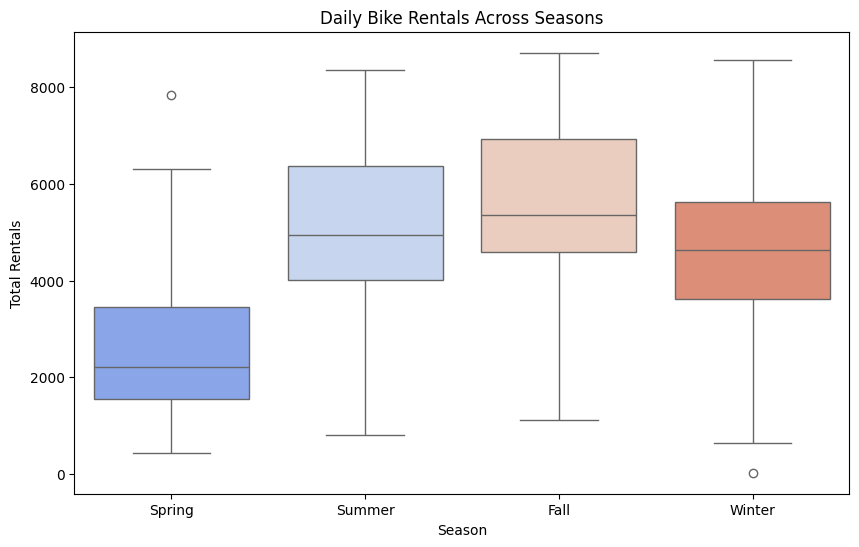

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='season_day', y='cnt_day', palette='coolwarm', hue = 'season_day')
plt.title('Daily Bike Rentals Across Seasons')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.show()

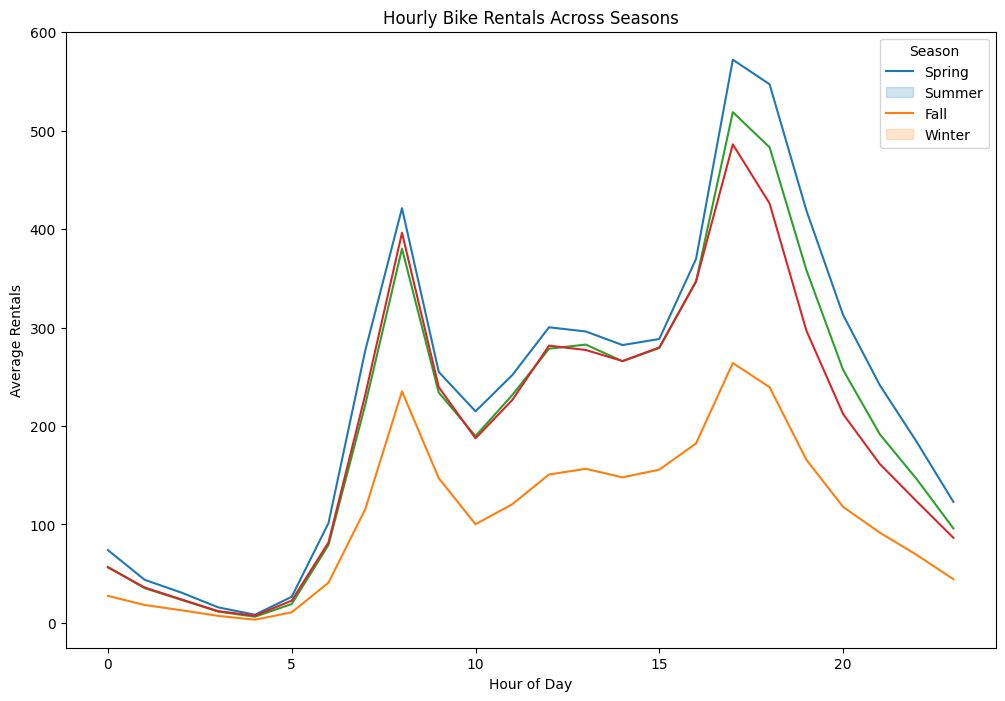

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=hourly_trends, x='hr', y='cnt', hue='season', palette='tab10')
plt.title('Hourly Bike Rentals Across Seasons')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.legend(title='Season', labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()


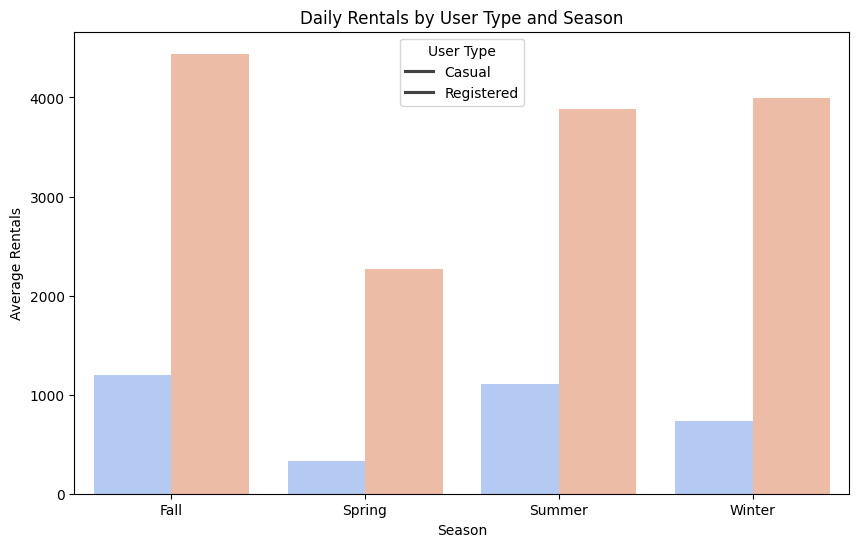

In [ ]:
user_type_summary = merged_data.groupby('season_day').agg({
    'casual_day': 'mean',
    'registered_day': 'mean'
}).reset_index()

user_type_summary_melted = user_type_summary.melt(id_vars='season_day',
                                                  value_vars=['casual_day', 'registered_day'],
                                                  var_name='User Type',
                                                  value_name='Average Rentals')

plt.figure(figsize=(10, 6))
sns.barplot(data=user_type_summary_melted, x='season_day', y='Average Rentals', hue='User Type', palette='coolwarm')
plt.title('Daily Rentals by User Type and Season')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.legend(title='User Type', labels=['Casual', 'Registered'])
plt.show()

#### Menjawab pertanyaan nomor 2
- Apa dampak kondisi cuaca (weathersit), suhu (temp dan atemp), dan kecepatan angin (windspeed) pada distribusi penyewaan sepeda (cnt), dan apakah terdapat perbedaan yang signifikan dalam hal sensitivitas terhadap faktor-faktor tersebut antara pengguna biasa dan pengguna terdaftar pada tingkat per jam dan per hari?

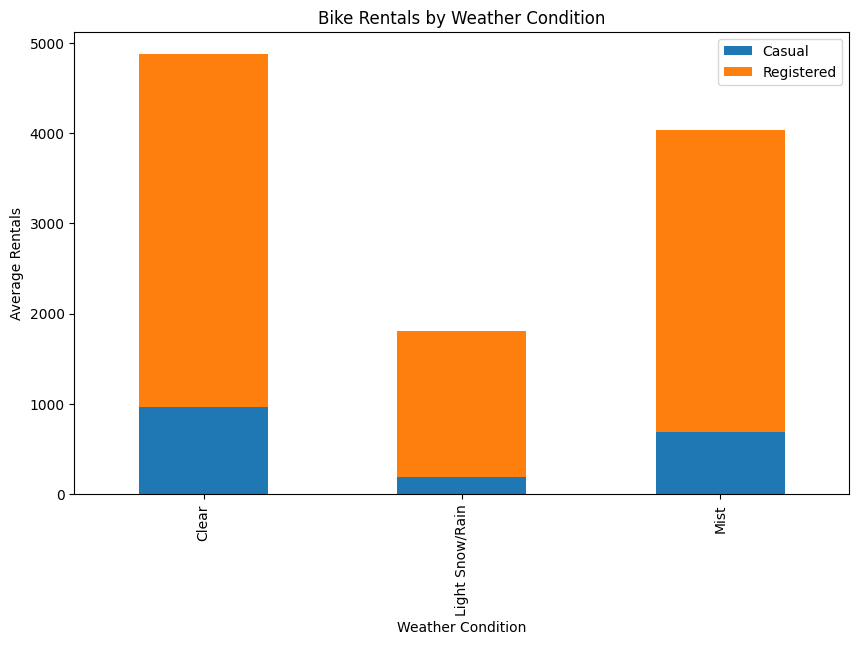

In [ ]:
weather_plot = merged_data.groupby('weathersit')[['casual_day', 'registered_day']].mean().reset_index()
weather_plot.plot(x='weathersit', kind='bar', stacked=True, figsize=(10, 6))
plt.title('Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Rentals')
plt.legend(['Casual', 'Registered'])
plt.show()

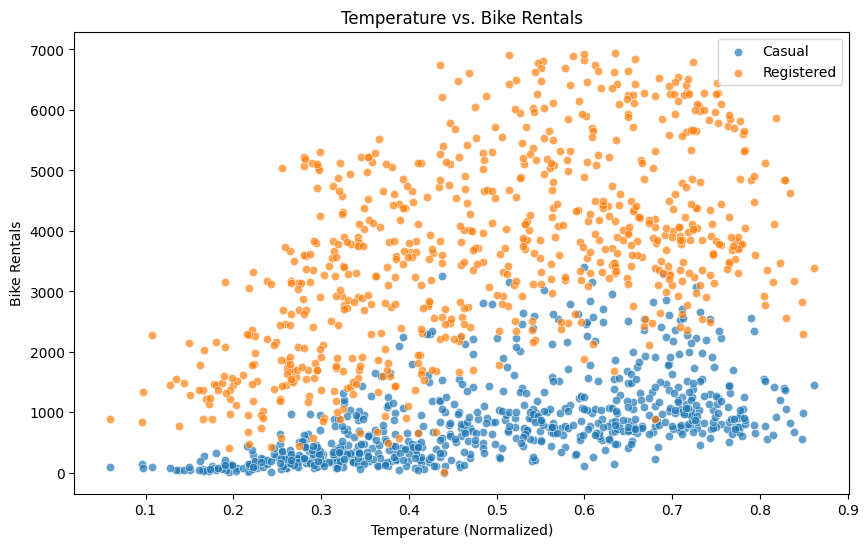

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='casual_day', data=merged_data, label='Casual', alpha=0.7)
sns.scatterplot(x='temp', y='registered_day', data=merged_data, label='Registered', alpha=0.7)
plt.title('Temperature vs. Bike Rentals')
plt.xlabel('Temperature (Normalized)')
plt.ylabel('Bike Rentals')
plt.legend()
plt.show()

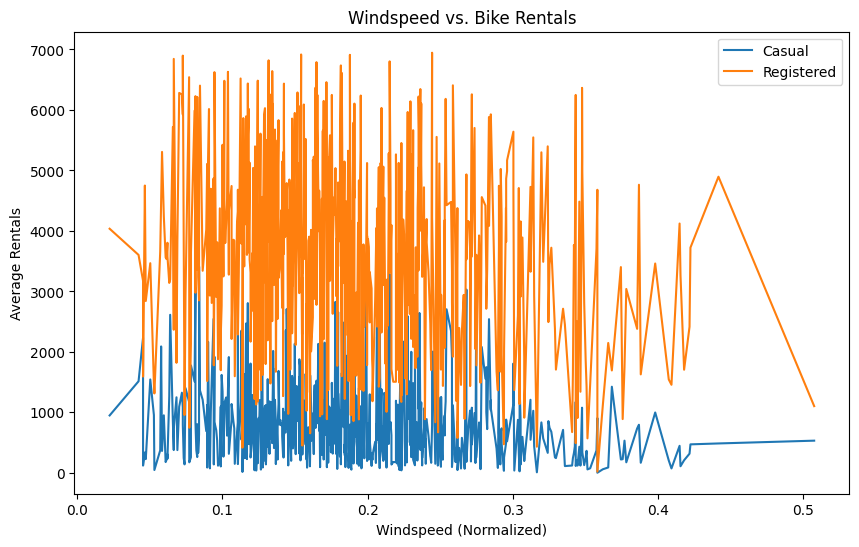

In [ ]:
windspeed_plot = merged_data.groupby('windspeed')[['casual_day', 'registered_day']].mean().reset_index()
windspeed_plot.plot(x='windspeed', kind='line', figsize=(10, 6))
plt.title('Windspeed vs. Bike Rentals')
plt.xlabel('Windspeed (Normalized)')
plt.ylabel('Average Rentals')
plt.legend(['Casual', 'Registered'])
plt.show()